```Z-Score → Outlier detection (point level).```

```Z-Test → Hypothesis testing (mean comparison).```

Lets do a Z score test to find ouliers in Jp morgan dataset

In [2]:
import pandas as pd

JP_morgan_chase = pd.read_csv(r'C:\Users\LENOVO\Downloads\archive (1)\JPMorgan Chase - JPMorgan Chase.csv')
print(JP_morgan_chase)


           Date     Open     High      Low    Close Adj Close          Volume
0      1/3/2000   $49.83   $50.25   $48.08   $48.58    $24.41  $12,019,200.00
1      1/4/2000   $47.08   $47.46   $46.13   $47.25    $23.87  $11,723,400.00
2      1/5/2000   $46.83   $48.38   $46.00   $46.96    $23.72   $8,714,550.00
3      1/6/2000   $46.75   $48.63   $46.50   $47.63    $24.06   $8,369,250.00
4      1/7/2000   $48.42   $49.00   $47.33   $48.50    $24.50   $6,571,950.00
...         ...      ...      ...      ...      ...       ...             ...
5858  4/17/2023  $139.95  $140.06  $137.66  $139.83   $139.83  $16,050,500.00
5859  4/18/2023  $140.27  $141.78  $139.03  $141.40   $141.40  $13,760,100.00
5860  4/19/2023  $141.23  $141.50  $140.40  $141.22   $141.22   $9,158,100.00
5861  4/20/2023  $139.91  $141.43  $139.84  $140.81   $140.81  $10,586,200.00
5862  4/21/2023  $139.74  $141.11  $138.78  $140.54   $140.54  $11,841,800.00

[5863 rows x 7 columns]


In [4]:
JP_morgan_chase.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
JP_morgan_chase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5863 entries, 0 to 5862
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       5863 non-null   object
 1   Open       5863 non-null   object
 2   High       5863 non-null   object
 3   Low        5863 non-null   object
 4   Close      5863 non-null   object
 5   Adj Close  5863 non-null   object
 6   Volume     5863 non-null   object
dtypes: object(7)
memory usage: 320.8+ KB


In [6]:
JP_morgan_chase.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,$49.83,$50.25,$48.08,$48.58,$24.41,"$12,019,200.00"
1,1/4/2000,$47.08,$47.46,$46.13,$47.25,$23.87,"$11,723,400.00"
2,1/5/2000,$46.83,$48.38,$46.00,$46.96,$23.72,"$8,714,550.00"
3,1/6/2000,$46.75,$48.63,$46.50,$47.63,$24.06,"$8,369,250.00"
4,1/7/2000,$48.42,$49.00,$47.33,$48.50,$24.50,"$6,571,950.00"
5,1/10/2000,$48.50,$48.92,$47.67,$47.67,$24.08,"$4,723,500.00"
6,1/11/2000,$46.67,$46.96,$45.50,$46.54,$23.51,"$8,405,550.00"
7,1/12/2000,$46.46,$47.25,$46.33,$46.83,$23.66,"$7,271,850.00"
8,1/13/2000,$47.42,$48.33,$47.04,$47.54,$24.02,"$6,918,900.00"
9,1/14/2000,$49.29,$50.50,$48.54,$49.25,$24.88,"$9,731,850.00"


In [7]:
# Converting date column
JP_morgan_chase['Date'] = pd.to_datetime(JP_morgan_chase['Date'])
JP_morgan_chase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5863 entries, 0 to 5862
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5863 non-null   datetime64[ns]
 1   Open       5863 non-null   object        
 2   High       5863 non-null   object        
 3   Low        5863 non-null   object        
 4   Close      5863 non-null   object        
 5   Adj Close  5863 non-null   object        
 6   Volume     5863 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 320.8+ KB


In [9]:
#replacing the symbols $ and ,
for i in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    JP_morgan_chase[i] = JP_morgan_chase[i].replace('[\$,]', '', regex=True)

print(JP_morgan_chase)

           Date    Open    High     Low   Close Adj Close       Volume
0    2000-01-03   49.83   50.25   48.08   48.58     24.41  12019200.00
1    2000-01-04   47.08   47.46   46.13   47.25     23.87  11723400.00
2    2000-01-05   46.83   48.38   46.00   46.96     23.72   8714550.00
3    2000-01-06   46.75   48.63   46.50   47.63     24.06   8369250.00
4    2000-01-07   48.42   49.00   47.33   48.50     24.50   6571950.00
...         ...     ...     ...     ...     ...       ...          ...
5858 2023-04-17  139.95  140.06  137.66  139.83    139.83  16050500.00
5859 2023-04-18  140.27  141.78  139.03  141.40    141.40  13760100.00
5860 2023-04-19  141.23  141.50  140.40  141.22    141.22   9158100.00
5861 2023-04-20  139.91  141.43  139.84  140.81    140.81  10586200.00
5862 2023-04-21  139.74  141.11  138.78  140.54    140.54  11841800.00

[5863 rows x 7 columns]


In [10]:
#converting to float

for z in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    JP_morgan_chase[z] = JP_morgan_chase[z].astype(float)

JP_morgan_chase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5863 entries, 0 to 5862
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5863 non-null   datetime64[ns]
 1   Open       5863 non-null   float64       
 2   High       5863 non-null   float64       
 3   Low        5863 non-null   float64       
 4   Close      5863 non-null   float64       
 5   Adj Close  5863 non-null   float64       
 6   Volume     5863 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 320.8 KB


In [14]:
from scipy import stats
import numpy as np

#calculating z score on Volumne column and creating a z_volume column
JP_morgan_chase['Z_Volume'] = stats.zscore(JP_morgan_chase['Volume'])

# marking outliers
outliers = JP_morgan_chase[np.abs(JP_morgan_chase['Z_Volume']) > 3]

print(outliers)




           Date   Open   High    Low  Close  Adj Close       Volume  Z_Volume
2024 2008-01-23  40.40  46.15  40.00  45.72      30.89   77137000.0  3.010428
2060 2008-03-14  38.80  38.80  36.01  36.54      24.69   77776000.0  3.044290
2061 2008-03-17  37.00  41.09  37.00  40.31      27.24  125296300.0  5.562468
2062 2008-03-18  42.19  42.88  41.25  42.71      28.86   76994300.0  3.002866
2144 2008-07-15  30.73  32.82  29.24  31.02      21.37   88717800.0  3.624114
...         ...    ...    ...    ...    ...        ...          ...       ...
3114 2012-05-18  33.99  33.99  32.97  33.49      24.60   82650100.0  3.302576
3115 2012-05-21  33.52  33.71  32.26  32.51      23.88   99554800.0  4.198384
3116 2012-05-22  33.32  34.58  32.99  34.01      24.99   84721000.0  3.412317
3137 2012-06-21  36.49  37.03  35.43  35.51      26.09   95637000.0  3.990773
3152 2012-07-13  35.06  36.20  34.86  36.07      26.72   83001000.0  3.321171

[123 rows x 8 columns]


In [17]:
print(outliers[['Date', 'Volume', 'Z_Volume']])

           Date       Volume  Z_Volume
2024 2008-01-23   77137000.0  3.010428
2060 2008-03-14   77776000.0  3.044290
2061 2008-03-17  125296300.0  5.562468
2062 2008-03-18   76994300.0  3.002866
2144 2008-07-15   88717800.0  3.624114
...         ...          ...       ...
3114 2012-05-18   82650100.0  3.302576
3115 2012-05-21   99554800.0  4.198384
3116 2012-05-22   84721000.0  3.412317
3137 2012-06-21   95637000.0  3.990773
3152 2012-07-13   83001000.0  3.321171

[123 rows x 3 columns]


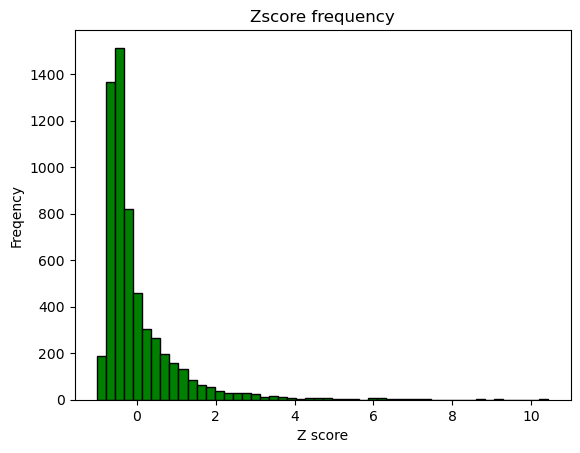

In [23]:
import matplotlib.pyplot as plt

plt.hist(JP_morgan_chase['Z_Volume'], bins=50, color='green', edgecolor='black')
plt.title('Zscore frequency')
plt.xlabel('Z score')
plt.ylabel('Freqency')
plt.show()

In [26]:
JP_morgan_chase[JP_morgan_chase['Z_Volume'] > 9][['Date', 'Z_Volume']]

,Date,Z_Volume
2236,2008-11-21,9.207163
3109,2012-05-11,10.437586


**Z test**

# Lets check if 2023 volumne average is diffrent from the other years

In [30]:
JP_morgan_chase['Date'].sort_values(ascending=False)

5862   2023-04-21
5861   2023-04-20
5860   2023-04-19
5859   2023-04-18
5858   2023-04-17
          ...    
4      2000-01-07
3      2000-01-06
2      2000-01-05
1      2000-01-04
0      2000-01-03
Name: Date, Length: 5863, dtype: datetime64[ns]

In [37]:
from statsmodels.stats.weightstats import ztest

Data_2023 = JP_morgan_chase[JP_morgan_chase['Date'].dt.year == 2023]['Volume']
Rest_Data = JP_morgan_chase[JP_morgan_chase['Date'].dt.year != 2023]['Volume']

In [38]:
z_stats, p_value = ztest(Data_2023, Rest_Data, alternative= 'two-sided')

print(f'z_stat is {z_stats} and p_value is {p_value}')

z_stat is -3.156775275252738 and p_value is 0.0015952423580205182


***If p_value <= 0.05, null hypothesis is unlikely, accepts alternative
If p_value > 0.05, stronly accepts null hypothesis, rejects alternative
So in my case p_value is 0.0015 which is far below 0.05, so it rejets null hypothesis. So it means average of volume is year 2023 is diffrent from rest years.***